# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant
import scipy.stats as ss
from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant

In [2]:
df = pd.read_csv("../data/boston_data.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
df.chas.value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

In [5]:
chas = df[["chas"]]

In [6]:
df.shape

(404, 14)

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [7]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [8]:
df_clean = df.drop("chas", axis=1, inplace=True)

df_clean = df[(np.abs(stats.zscore(df))<3).all(axis=1)]
df_clean.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [9]:
df_clean.shape

(344, 13)

we have dropped all the rows where chas dummy variable took value 1, which is not correct necessarily. We first get rid of it and then we will join it using a left join.

In [10]:
df_clean.merge(chas, how="left", left_index=True, right_index=True).head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7,0.0
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6,0.0
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3,0.0
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4,0.0
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5,0.0


In [11]:
df_clean.shape

(344, 13)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

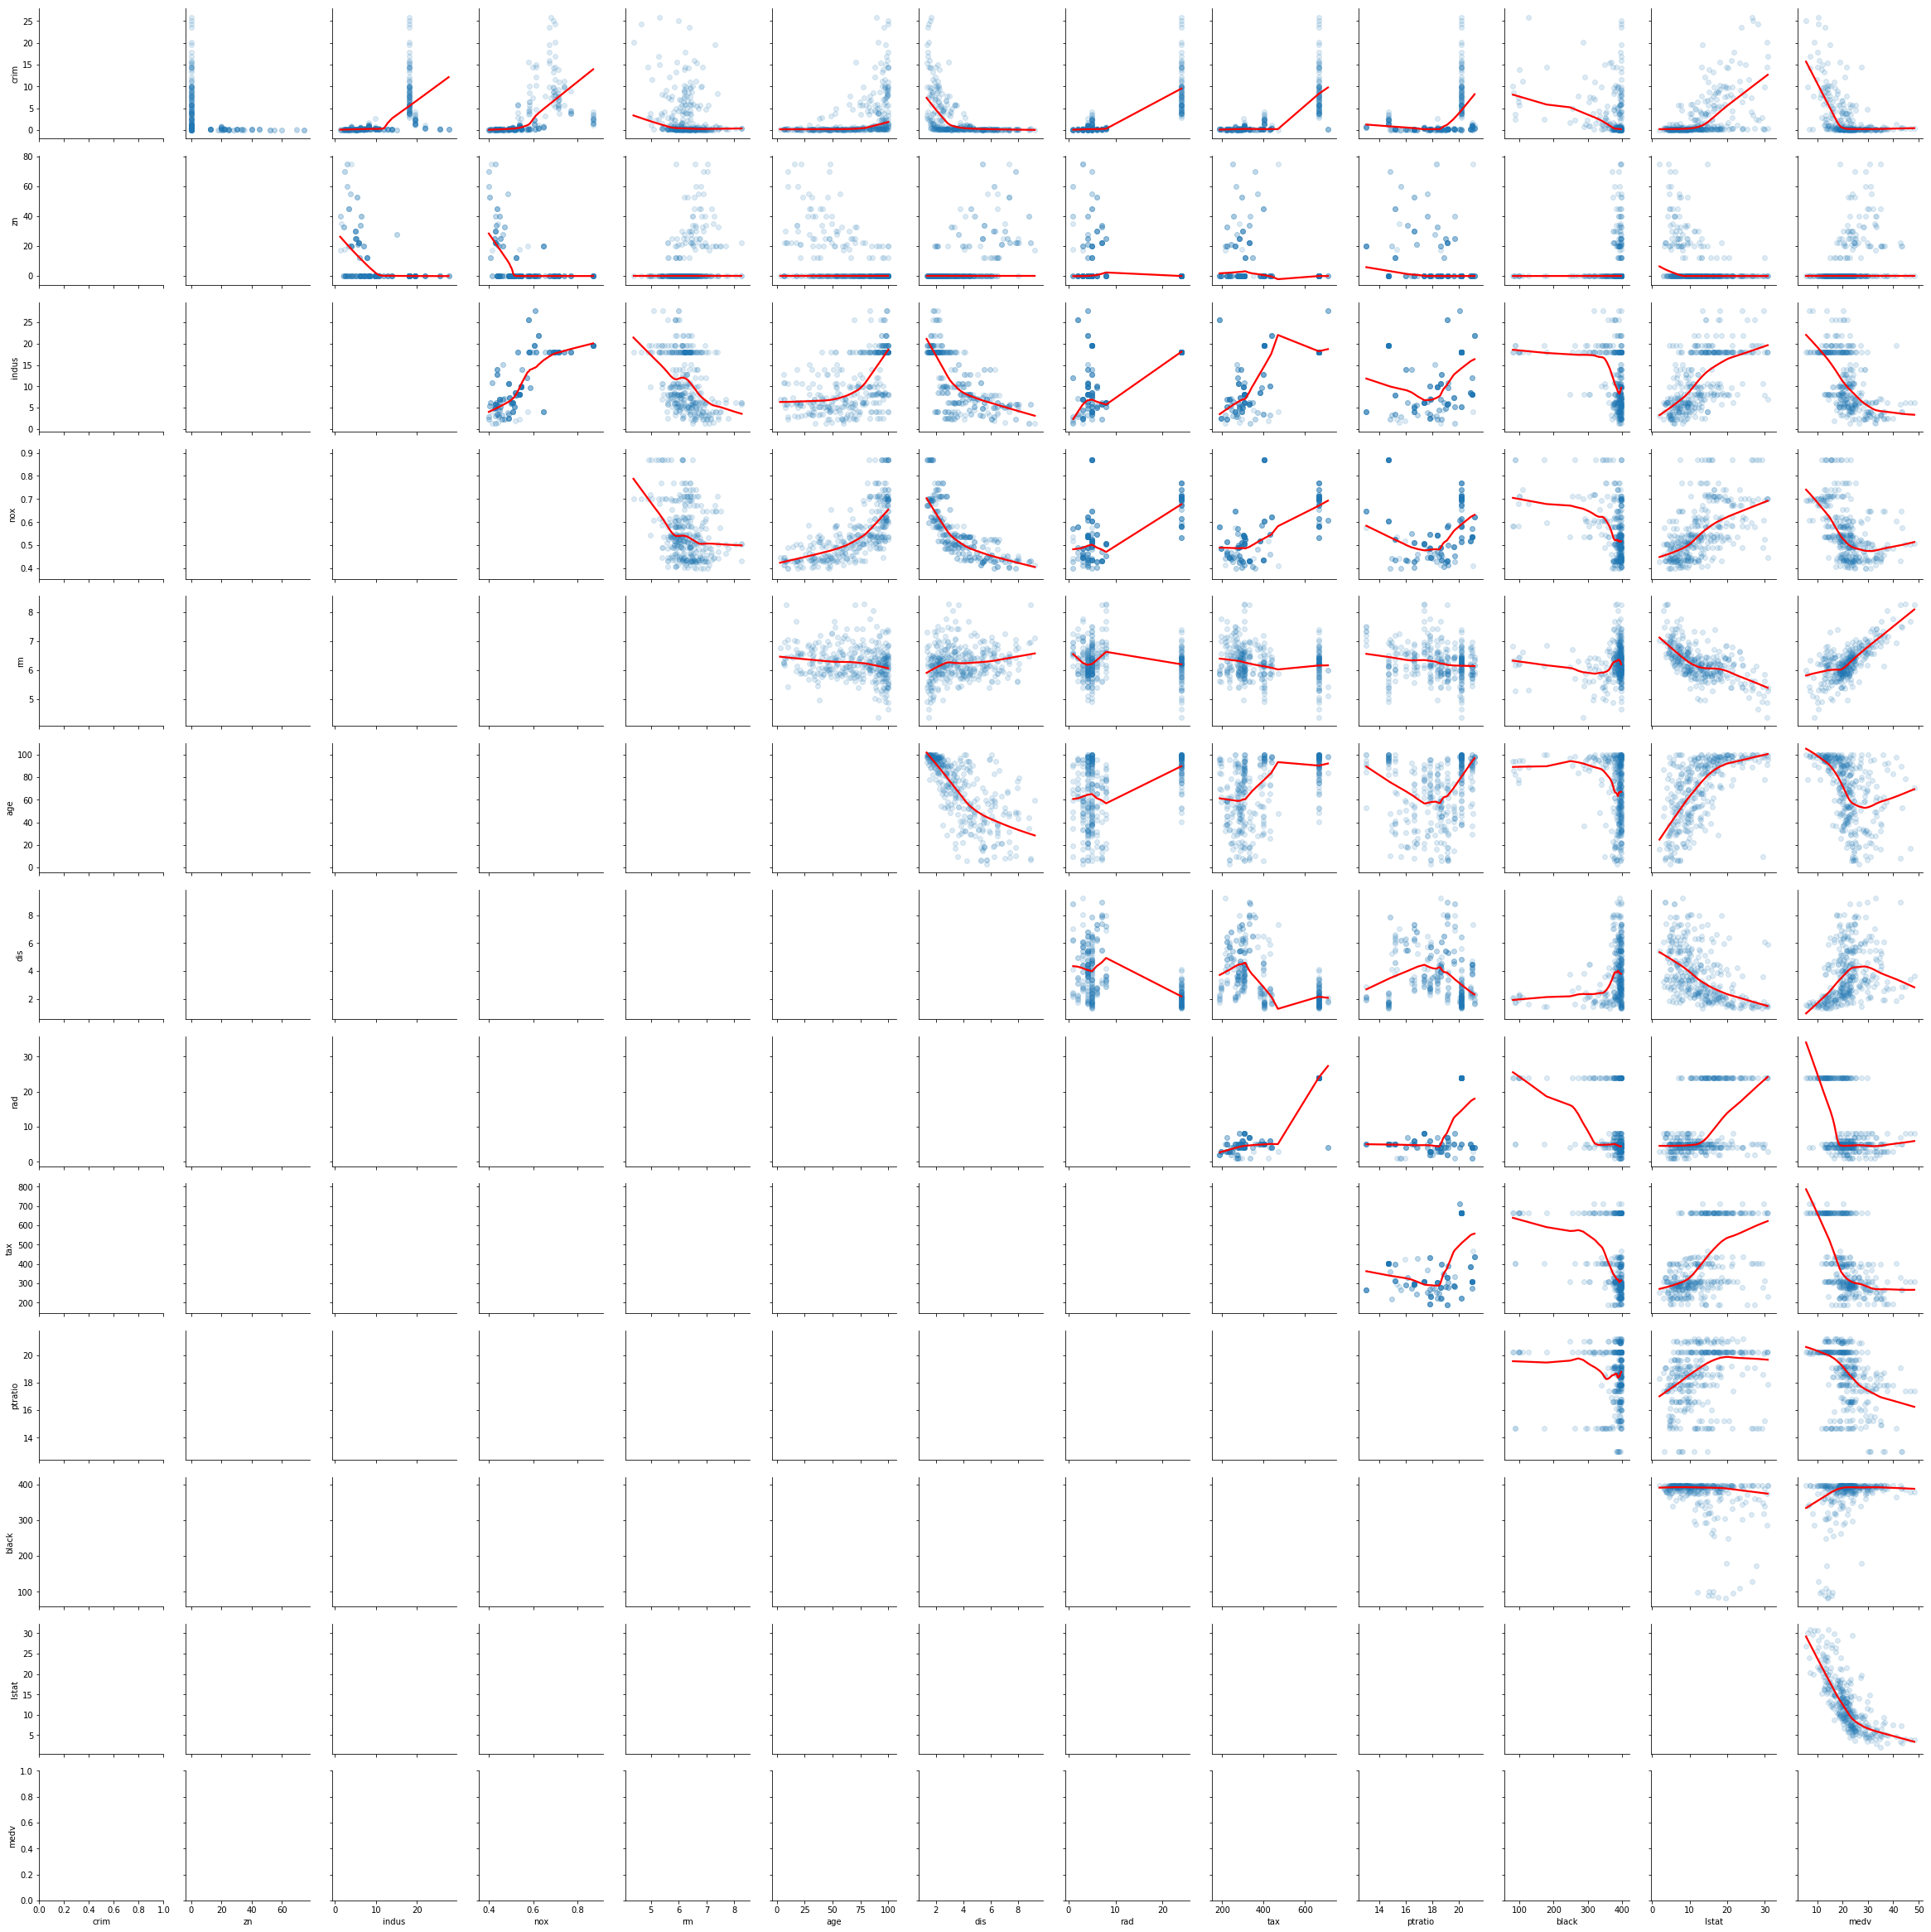

In [57]:
# Your plots here
f = sns.PairGrid(df_clean)
f = f.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [12]:
X = add_constant(df_clean)
mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const      781.216901
crim         3.626987
zn           1.807776
indus        3.464206
nox          4.177745
rm           2.926751
age          2.927307
dis          3.658005
rad          8.466793
tax          8.660421
ptratio      1.870614
black        1.236638
lstat        3.555503
medv         4.838927
dtype: float64


/home/salva/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
df_clean = df_clean.drop("rad", axis=1)

In [14]:
X = add_constant(df_clean)
mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const      709.525261
crim         2.762145
zn           1.786983
indus        3.354926
nox          4.082096
rm           2.925781
age          2.926800
dis          3.589399
tax          3.923572
ptratio      1.782194
black        1.236336
lstat        3.551604
medv         4.602092
dtype: float64


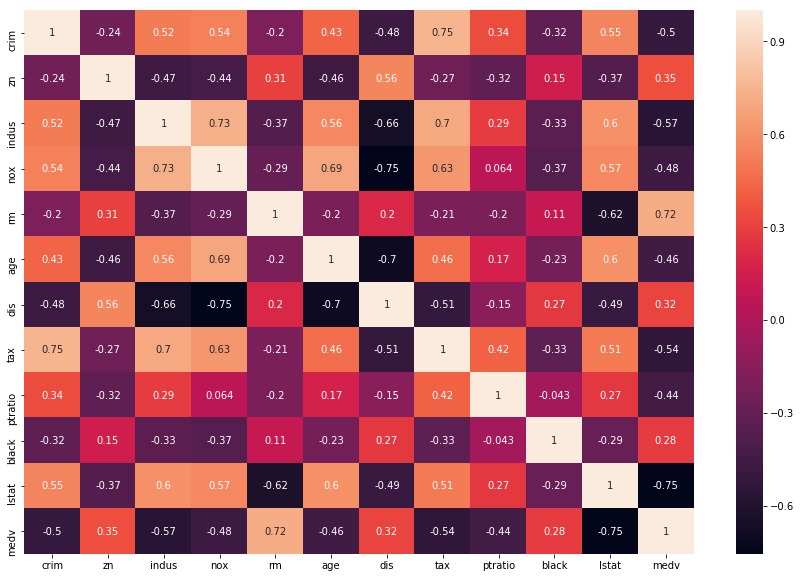

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_clean.corr(), annot=True, ax=ax)

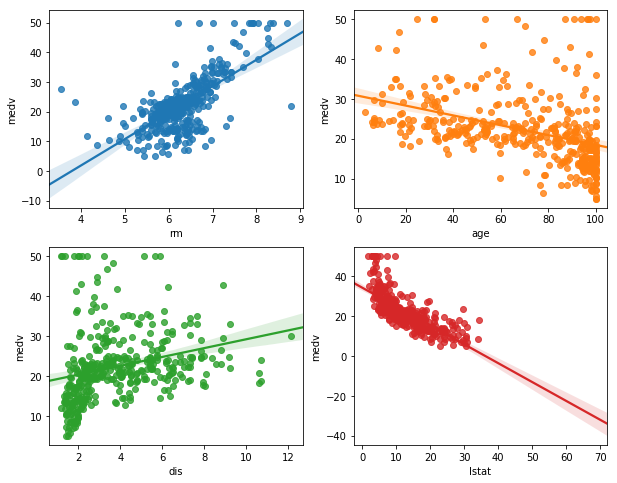

In [16]:
f, axes = plt.subplots(2, 2)
f.set_size_inches(10,8)
sns.regplot(x="rm", y="medv", data=df, ax=axes[0, 0])
sns.regplot(x="age", y="medv", data=df, ax=axes[0, 1])
sns.regplot(x="dis", y="medv", data=df, ax=axes[1, 0])
sns.regplot(x="lstat", y="medv", data=df, ax=axes[1, 1])

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
# Your code here
df_clean.medv.describe().to_frame()

,medv
count,344.000000
mean,21.870349
std,7.049946
min,5.600000
25%,17.800000
50%,21.400000
75%,24.700000
max,48.300000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [19]:
# Your code here
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

y = df["medv"]
X = df.drop(columns = "medv")

X, y = shuffle(X, y, random_state=87)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model_2 = RandomForestRegressor(max_depth=2)
rf_model_4 = RandomForestRegressor(max_depth=4)
rf_model_6 = RandomForestRegressor(max_depth=6)
rf_model_8 = RandomForestRegressor(max_depth=8)
rf_model_10 = RandomForestRegressor(max_depth=10)

lst=[rf_model_2, rf_model_4, rf_model_6, rf_model_8, rf_model_10]

In [21]:
for i in lst:
    i.fit(X_train, y_train)

/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/salva/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/salva/anaconda3/lib/python3.7/site-package

Now, plot the score for each tree on the training set and on the testing set.

Text(0.5, 0, 'training samples')

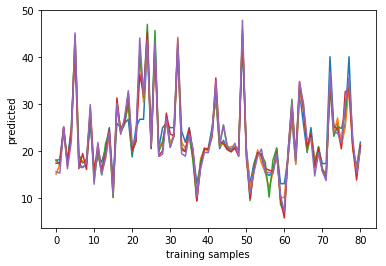

In [24]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(rf_model_2.predict(X_test), label="rf_model_2")
plt.plot(rf_model_4.predict(X_test), label="rf_model_4")
plt.plot(rf_model_6.predict(X_test), label="rf_model_6")
plt.plot(rf_model_8.predict(X_test), label="rf_model_8")
plt.plot(rf_model_10.predict(X_test), label="rf_model_10")
plt.ylabel('predicted')
plt.xlabel('training samples')

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [25]:
lst = [rf_model_2, rf_model_4, rf_model_6, rf_model_8, rf_model_10]
for i in lst:
    i.fit(X_train, y_train)
    
pred_test_lst = []
for i in lst:
    pred_test_lst.append(i.predict(X_test))

In [26]:
r2_score_lst = []
for i in pred_test_lst:
    r2_score_lst.append(r2_score(y_test, i))

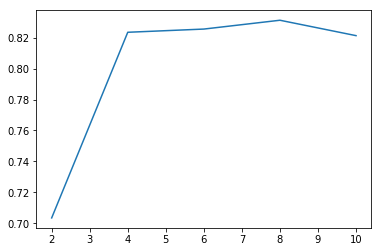

In [27]:
lst = [2,4,6,8,10]
plt.plot(lst, r2_score_lst)

### Your response here
The depper the tree, the better it behaves in terms of model score and accuracy

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

### Your response here
Generally, increasing max depth decreases bias at the expense of increasing variance. In other words, having a maximum depth of 1, the model has high bias but low variance. With the increaing of max depth to 10, the bias decreases, but the tradeoff is a higher variance.

### Best-Guess Optimal Model. 

What is the max_depth parameter that you think would optimize the model?

### Your response here
When we look at the graph, the slope of learning curve tend to be much less steep moving from max_depth = 4 to 5, this is known as the elbow, and it indicates us this is the optimal point where the trade-off balance is minimized. 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

# Your response here

- How relevant today is data that was collected from 1978? Are the features present in the data sufficient to describe a home?

    Not fully relevant, some features are still important (such as room numbers) while others are not.


- Is the model robust enough to make consistent predictions?

    With the increasing of the max_depth, the predictions seem to be stable.


- Would data collected in an urban city like Boston be applicable in a rural city?

    No, there are features that doesn't applied to rural city, there are also features lacking for the prediction of rural house price.